In [1]:
# Practical 3 : Cricket Performance Comparison Practical

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn theme
sns.set(style="whitegrid")

In [3]:
# --------------------------------------------------------------
# Step 1: Create a large synthetic dataset (~300+ records)
# --------------------------------------------------------------

np.random.seed(101)

players = [f"Player_{i}" for i in range(1, 31)]  # 30 players
teams = ["MI", "CSK", "RCB", "KKR", "RR", "SRH"]  # pretend league teams
seasons = [2019, 2020, 2021, 2022, 2023]

data = {
    "Player": np.random.choice(players, 350),
    "Team": np.random.choice(teams, 350),
    "Season": np.random.choice(seasons, 350),
    "Runs": np.random.randint(0, 120, 350),       # runs per match
    "Balls_Faced": np.random.randint(1, 80, 350), # balls faced
    "Out": np.random.choice([0,1], 350, p=[0.25, 0.75]) # chance of not-out
}

df = pd.DataFrame(data)

In [4]:
df.shape

(350, 6)

In [5]:
df.head()

,Player,Team,Season,Runs,Balls_Faced,Out
0,Player_12,RCB,2021,21,38,1
1,Player_18,KKR,2023,33,69,1
2,Player_7,CSK,2023,67,14,1
3,Player_24,CSK,2021,87,73,1
4,Player_30,KKR,2021,44,63,1


In [6]:
# --------------------------------------------------------------
# Step 2: Calculate Player Season-wise Batting Metrics
# --------------------------------------------------------------

# Aggregate season performance per player
season_stats = df.groupby(["Player","Season"]).agg({
    "Runs": "sum",
    "Balls_Faced": "sum",
    "Out": "sum"
}).reset_index()

# Avoid divide-by-zero errors
season_stats["Out"] = season_stats["Out"].replace(0, np.nan)

# Calculate batting average per season
season_stats["Batting_Avg"] = season_stats["Runs"] / season_stats["Out"]

# Calculate strike rate
season_stats["Strike_Rate"] = (season_stats["Runs"] / season_stats["Balls_Faced"]) * 100

print("🏏 Sample Season Stats:")
print(season_stats.head())


🏏 Sample Season Stats:
      Player  Season  Runs  Balls_Faced  Out  Batting_Avg  Strike_Rate
0   Player_1    2020    69           83  2.0         34.5    83.132530
1   Player_1    2021     7            8  1.0          7.0    87.500000
2   Player_1    2022    15           26  1.0         15.0    57.692308
3   Player_1    2023   146           74  2.0         73.0   197.297297
4  Player_10    2019   313          199  2.0        156.5   157.286432


In [7]:
# --------------------------------------------------------------
# Step 3: Identify Top Performing Batsmen by Runs
# --------------------------------------------------------------

top_players = season_stats.groupby("Player")["Runs"].sum().sort_values(ascending=False).head(5)
top_players_list = list(top_players.index)

print("\n⭐ Top 5 Batsmen (Total Runs across seasons):")
print(top_players)

top_season_data = season_stats[season_stats["Player"].isin(top_players_list)]


⭐ Top 5 Batsmen (Total Runs across seasons):
Player
Player_16    1164
Player_4      966
Player_8      921
Player_19     912
Player_24     902
Name: Runs, dtype: int64


In [8]:
top_season_data

,Player,Season,Runs,Balls_Faced,Out,Batting_Avg,Strike_Rate
30,Player_16,2019,290,74,2.0,145.000000,391.891892
31,Player_16,2020,313,279,3.0,104.333333,112.186380
32,Player_16,2021,315,193,4.0,78.750000,163.212435
33,Player_16,2022,116,21,1.0,116.000000,552.380952
34,Player_16,2023,130,65,1.0,130.000000,200.000000
43,Player_19,2019,187,104,3.0,62.333333,179.807692
44,Player_19,2020,91,78,1.0,91.000000,116.666667
45,Player_19,2021,109,3,1.0,109.000000,3633.333333
46,Player_19,2022,171,200,2.0,85.500000,85.500000
47,Player_19,2023,354,155,3.0,118.000000,228.387097


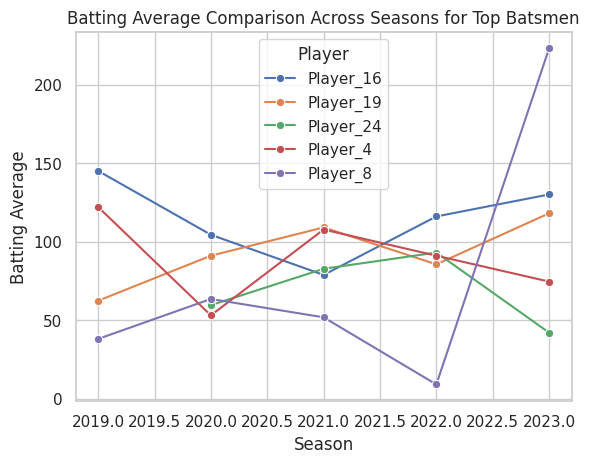

In [9]:
# --------------------------------------------------------------
# Step 4: Compare Their Batting Averages Across Seasons
# --------------------------------------------------------------

plt.figure()
sns.lineplot(data=top_season_data, x="Season", y="Batting_Avg", hue="Player", marker="o")
plt.title("Batting Average Comparison Across Seasons for Top Batsmen")
plt.xlabel("Season")
plt.ylabel("Batting Average")
plt.show()



📊 Strike Rate by Team:
  Team  Runs  Balls_Faced  Strike_Rate
0  CSK  4025         2599   154.867257
1  KKR  2736         2194   124.703737
2   MI  3931         2917   134.761742
3  RCB  3234         2140   151.121495
4   RR  3138         2283   137.450723
5  SRH  3056         2394   127.652464


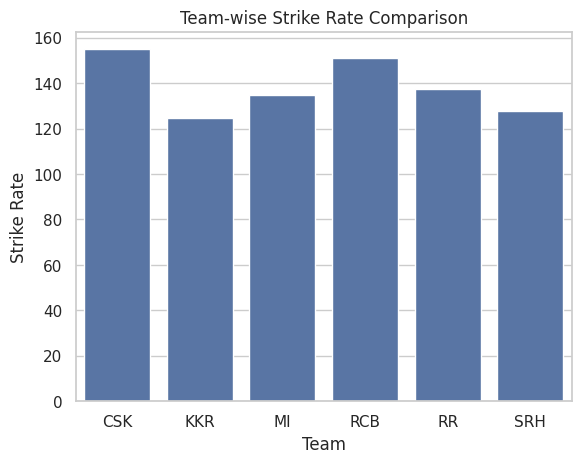

In [10]:
# --------------------------------------------------------------
# Step 5: Team-wise Strike Rate Performance in League
# --------------------------------------------------------------

team_stats = df.groupby("Team").agg({
    "Runs": "sum",
    "Balls_Faced": "sum"
}).reset_index()

team_stats["Strike_Rate"] = (team_stats["Runs"] / team_stats["Balls_Faced"]) * 100

print("\n📊 Strike Rate by Team:")
print(team_stats)

plt.figure()
sns.barplot(x="Team", y="Strike_Rate", data=team_stats)
plt.title("Team-wise Strike Rate Comparison")
plt.xlabel("Team")
plt.ylabel("Strike Rate")
plt.show()


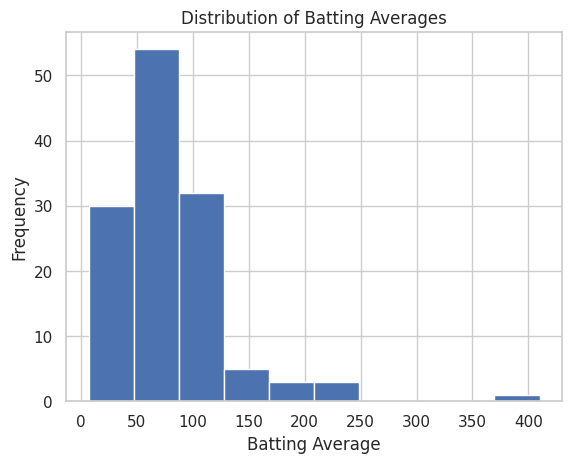

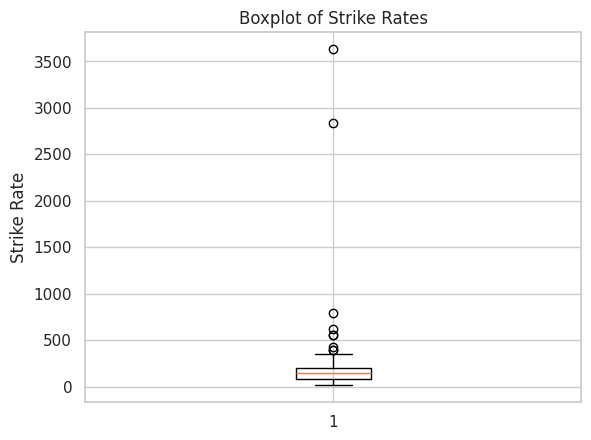

In [11]:
# --------------------------------------------------------------
# Step 6: Distribution Visualization
# --------------------------------------------------------------

plt.figure()
plt.hist(season_stats["Batting_Avg"])
plt.title("Distribution of Batting Averages")
plt.xlabel("Batting Average")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.boxplot(season_stats["Strike_Rate"])
plt.title("Boxplot of Strike Rates")
plt.ylabel("Strike Rate")
plt.show()